# <center>Welcome to Supervised Learning</center>
## <center>Part 1: Introduction to machine learning and the bias-variance tradeoff</center>
## <center>Instructor: Andras Zsom</center>

## The topic of the course series: supervised Machine Learning (ML)
- how to build an ML pipeline from beginning to deployment
- we assume you already performed data cleaning
- this is the first course out of 6 courses
    - **Part 1: Introduction to machine learning and the bias-variance tradeoff**
    - Part 2: How to prepare your data for supervised machine learning
    - Part 3: Evaluation metrics in supervised machine learning
    - Part 4: SVMs, Random Forests, XGBoost
    - Part 5: Missing data in supervised ML
    - Part 6: Interpretability
- you can complete the courses in sequence or complete individual courses based on your interest

## Tools
- we use python
    - pros: easy to use for a beginner programmer
    - cons: it is very difficult to write computationally efficient code
    - the divide between users and developers of python packages are wide
- packages we use: sklearn, pandas, numpy, matplotlib, XGBoost, SHAP
- if you are a python user, you need to know exactly what you are doing
    - carefully read the manual, work through the examples, test every line of code you write
        - good test of your understanding: could I write the function/method myself if I had to?
    - do not assume your code works, always test everything
    - there are two types of errors:
        - one that gives an error message
            - usually easy to fix
            - the error message tells you in which line the error occurs
            - read and understand the error message
            - if it's not obvious what the error is, read more on it on stackoverflow for example
        - sneaky errors without error message
            - these are tough!
            - your code runs and it gives some output but something is off
            - just staring at the code won't reveal the bug
            - print print print or use a debugger
            - check every line of code, trace issues through the code
    - to reduce the number of errors/bugs, do test-driven code development
        - first think about what the output of a function call/cell/piece of a piece of code should be
        - only then write the code
        - check if you got the expected output

### Learning objectives of this course

By the end of the course, you will be able to
- describe how a task like spam filtering can be solved with explicit coding instructions vs. a machine learning algorithm that learns from examples (training data),
- summarize the similarities and differences between supervised and unsupervised ML,
- list the pros and cons of supervised machine learning,
- define the mathematical model behind linear and logistic regression,
- explain what the loss function is,
- describe the two main types of regularization and why it is important,
- perform a simple train/validation/test split on IID data,
- apply linear and logistic regression to datasets,
- tune the regularization hyperparameter,
- identify models with high bias and high variance,
- select the best model and measure its performance on a previously unseen dataset, the test set.


# Module 1: Intro to Machine Learning
### Learning objectives of this module:
- describe how a task like spam filtering can be solved with explicit coding instructions vs. a machine learning algorithm that learns from examples (training data),
- summarize the similarities and differences between supervised and unsupervised ML,
- list the pros and cons of supervised machine learning,

### Supervised ML

- supervised ML is probably the most successful area in ML (based on economic value created)
    - **online advertising**: given an ad and user info, will the user click on the ad?
    - **real estate**: given home features, can we predict the house price?
    - **finance**: given an applicant and a finalcial product (e.g., a loan), will this applicant be able to successfully pay back the loan?
    - **health care**: given a patient, symptoms, and maybe test results, can we predict the illness? 
    - ...
- supervised ML pros:
    - **automation**: computers perform calculations faster than humans (and computers are cheaper)
    - **learn from examples**: no need to explicitly tell the computer what to do. the computer figures out what to do based on examples (data)
- supervised ML con:
    - it can be difficult or labor-intensive to collect training data
    - there is no guarantee that you will be able to develop an accurate model based on the data you have

### Example: spam filters
- Traditional coding pipeline with explicit instructions

<center><img src="figures/traditional_pipeline.png" width="600"></center>

### Example: spam filters
- ML pipeline

<center><img src="figures/ML_pipeline.png" width="600"></center>

- the data: feature matrix (X) and target variable (Y)
    - X can be structured (tabular data most commonly stored in excel and csv files or SQL databases)
    - X can be unstructured (e.g., images, text, voice recording, video)
    - Y can be categorical, the problem is **classification** (e.g., click or not click on an ad, sick or not sick)
    - Y can be continuous, the problem is **regression** (e.g., predict house price, stock price, age)
    - Y can be missing, the problem is **clustering**
- **we focus on structured data during the course series!**

### Structured data
| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>Y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|

### Other areas of ML
- unsupervised ML 
   - only the feature matrix X is available, there is no target variable
   - the goal is to find structure (clusters) in the data
   - often used in customer segmentation
- recommender systems
   - recommend products to a customer based on what products similar customers enjoyed
- reinforcement learning
   - the learning system, called an agent, can observe the environment, select and perform actions, and get rewards and penalties in return. Goal: come up with strategy to maximize rewards
   - often used when virtual environment is available (e.g., games like go or warcraft)
   - sounds appealing to use in real environments (like self-driving cars) but agents learn slow, lots of cars would need to be broken to teach an agent to drive this way 
- deep learning
   - uses neural networks and often works with unstructured data
   - technically deep learning is supervised or unsupervised
   - extremely successful on large datasets

<center><img src="figures/shallow_vs_deep_learning.png" width="500"></center>

# Module 2: Overview of linear and logistic regression with regularization
### Learning objectives of this module:
- define the mathematical model behind linear and logistic regression,
- explain what the loss function is,
- describe the two main types of regularization and why it is important,

### Supervised ML algorithms: three parts
- 1) **a mathematical model ($f$)** is used to convert the feature values into a prediction

$f(X_i) = y_i'$, where $i$ is the $i$th data point in our sample. $X_i$ is a vector and $y_i'$ is a number.
    - $f$ is your supervised ML algorithm
    - it usually has a number of intrinsic parameters 
- 2) **an optimization algorithm** is used to determine the intrinsic parameter values given the training set 
    - there are various algorithms
    - e.g., gradient descent, backpropagation
- 3) the optimization algorithm minimizes a metric called **the cost function**
    - the cost function is used to determine the best intrinsic parameters of one model based on the training data

### Linear Regression

In [ ]:
# these lines are just illustration
# no X_train or y_train are defined yet so it won't run
from sklearn.linear_model import LinearRegression # import the model
LinReg = Linear_Regression() # initialize a simple linear regression model 
LinReg.fit(X_train,y_train) # we will learn now what happens when you issue this line

- This is the **mathematical model**:
    #### <center>$f(X_i) = y_i' = \theta_0 + X_{i1} \theta_1 + X_{i2} \theta_2 +$ ... $= \theta_0 + \sum_{j=1}^{m} \theta_j  X_{ij} $,</center>
where $y_i'$ is the prediction of the linear regression model and $\theta$ are parameters.
- The **optimization algorithm** is some form of gradient descent
    - we won't go into detail but the basic idea is that gradient descent will find the $\theta$ values that minimize the cost function on the training data
- The **cost function** is MSE - mean squared error
    #### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression() # initialize a simple logistic regression model
LogReg.fit(X_train,y_train) # we will learn what happens when you issue this line in classification

- name is misleading, logistic regression is for classification problems!
- the model:

<center>$f(X_i) = y_i' = \frac{1}{1+e^{-z}}$, where</center>

<center>$z = \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij}$</center>

- $f(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function which maps real values to be between 0 and 1 such that the real value 0 is mapped to 0.5. 
    - the output of a sigmoid function can be thought of as a predicted probability.

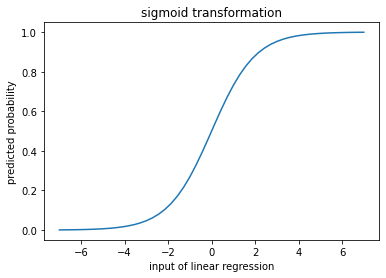

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.plot(z,sigmoid(z))
plt.xlabel('input of linear regression')
plt.ylabel('predicted probability')
plt.title('sigmoid transformation')
plt.savefig('figures/sigmoid_trans.png',dpi=300)
plt.show()

- The **optimization algorithm** is some form of gradient descent
- the logloss metric is used as a **cost function** in logistic regression

<center>$L(\theta) = - \frac{1}{N}\sum_{i=1}^{n} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>

- two scenarios:
   - y_i = 0 - left term disappears
   - y_i = 1 - right term disappears
- log(0) is undefined
   - $y_i'$ is usually replaced with $\max(\min(y_i',1-10^{-15}),10^{-15})$ to avoid this issue

**The extreme cases**

- the classifier is confidently wrong
   - $y_i' = 10^{-15}$ for points in class 1
   - $y_i' = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $y_i' = 10^{-15}$ for points in class 0
   - $y_i' = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>

- the logloss metric also needs to be minimized

### Regularization
- models tend to overfit on the training data and such models don't perform well on previously unseen points
    - a sure sign of overfitting in linear and logistic regression is huge (positive or negative) theta values

# Module 3: The bias-variance tradeoff
### Learning objectives of this module:
- perform a simple train/validation/test split on IID data,
- apply linear and logistic regression to datasets,
- tune the regularization hyperparameter,
- identify models with high bias and high variance,
- select the best model and measure its performance on a previously unseen dataset, the test set.
